# Методы оптимизации
## Лабораторная работа № 3

In [1]:
import inspect
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [3]:
pylab.rcParams['figure.figsize'] = (20, 12)

In [4]:
def load_f(name):
    to = []
    with open(name,'r') as f:
        for line in f.readlines():
            if line.strip() == '':
                continue
            to.append(np.array([float(i) for i in line.strip().split(' ') if i != '']))
    return np.array(to)

In [64]:
P2 = load_f("P2.txt").T[2].reshape(1600,1)
P4_V1 = load_f("P4_V1.txt").T[2].reshape(1600,1)
P4_V2 = load_f("P4_V2.txt").T[2].reshape(1600,1)
P4_V3 = load_f("P4_V3.txt").T[2].reshape(1600,1)
P4_V4 = load_f("P4_V4.txt").T[2].reshape(1600,1)

In [6]:
P2.shape,P4_V1.shape,P4_V2.shape,P4_V3.shape,P4_V4.shape

((1600, 1), (1600, 1), (1600, 1), (1600, 1), (1600, 1))

In [7]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(p):
    sns.set_context("talk")
    sns.set_style('whitegrid')
    X, Y, Z = p.T[0].reshape(40,40),p.T[1].reshape(40,40),p.T[2].reshape(40,40) 
    ax = plt.axes(projection='3d')
    ax.scatter(X,Y,Z)
    ax.plot_surface(X,Y,Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)

In [92]:
def plot_countor(p):
    sns.set_context("talk")
    sns.set_style('whitegrid')
    X, Y, Z = p.T[0].reshape(40,40),p.T[1].reshape(40,40),p.T[2].reshape(40,40)
   
    cp = plt.contour(X, Y, Z, 20,colors='black');
    
    plt.clabel(cp, inline=True, fontsize=16)
    plt.colorbar(cp)
    plt.xlabel('x')
    plt.ylabel('y')

In [9]:
'''P2 = load_f("P2.txt")
P4_V1 = load_f("P4_V1.txt")
P4_V2 = load_f("P4_V2.txt")
P4_V3 = load_f("P4_V3.txt")
P4_V4 = load_f("P4_V4.txt")'''

'P2 = load_f("P2.txt")\nP4_V1 = load_f("P4_V1.txt")\nP4_V2 = load_f("P4_V2.txt")\nP4_V3 = load_f("P4_V3.txt")\nP4_V4 = load_f("P4_V4.txt")'

In [10]:
'''plot_3d(P2)'''


'plot_3d(P2)'

#### Метод перебора

In [149]:
def perebor(f):
    min = f[0][0]
    bi,bj=0,0
    for i in range(len(f)):
        for j in range(len(f[0])):
            if (f[i][j]<min):
                min = f[i][j]
                bi,bj=i,j
    return min,bi,bj
    
perebor(P2)

(0.00225006, 629, 0)

#### Метод случайного поиска

In [96]:
def random_search(f,p=0.5):
    n = int(f.shape[0]*p)
    best_f = f[0][0]
    for i in np.random.permutation(f.shape[0])[:n]:
        for j in np.random.permutation(f.shape[1])[:n]:
            if f[i][j] < best_f:
                best_f = f[i][j]
    return best_f

random_search(P2)

0.00244664

#### Метод имитации отжига

In [42]:
### Больцмановский отжиг
def T_b(k,T0=1e4):
    return T0/np.log(1+k)

def G_b(dx,T,D=2):
    a1 = 1/np.sqrt(2*np.pi*T)**D
    a2 = np.exp(-(dx**2)/(2*T))
    return a1*a2

def h(de,T):
    a = np.exp(-de/T)
    if a is None:
        return 0
    return a
    

In [43]:
### Коши
def T_k(k,T0=100):
    return T0/k

def G_k(dx,T,D=2):
    a = T/(dx**2 + T**2)/np.pi
    return a**D
    

In [44]:
### Тушение больцмана
def T_bt(k,c=0.8,T0=1e4):
    return T0*c**k
    

In [45]:
def my_G(dx,a,b):
    return np.random.randint(0,a),np.random.randint(0,b)

In [76]:
def imitation_of_fire(f,a,T=T_bt,G=my_G,h=h,max_iter=5000):
    a0,b0=a
    x,y = int(np.random.rand()*a0),int(np.random.rand()*b0)
    E_o = f(x,y)
    k = 0
    er = max_iter
    a = np.random.rand()
    x_n,y_n=0,0
    while True:
        k += 1
        #x_n,y_n = G(np.array([x,y]),T(k))
        x_n,y_n = G(np.array([x,y]),a0,b0)
        E_n = f(x_n,y_n)
        a = np.random.rand()
        if a < h(E_n-E_o,T(k)) and E_n < E_o:
            E_o = E_n
            x,y = x_n,y_n
            er = max_iter
        else:
            er -= 1
            k -= 1
            if er == 0:
                break
    return E_o

f = lambda x,y: P2[int(x)][int(y)]
a = P2.shape[0],P2.shape[1]
imitation_of_fire(f,a)

0.00225006

#### Генетический алгоритм

In [276]:
def create_new_population(f,a,h=100):
    population = []
    #scores = []
    
    while not len(population) == h:
        new_child = []
        for ai in a:
            new_child.append(np.random.randint(ai))
        
        population.append(np.array(new_child))
        #scores.append(f(*new_child))
    
    #return np.array(population),np.array(np.array(scores))
    #return population,scores
    return population
    
def sort_pop(f,population):
    n = len(population)
    scores = np.zeros(n)
    for i in range(n):
        scores[i] = f(*population[i])
        
    arg_sort = scores.argsort()
    return np.array(population)[arg_sort].tolist()

def arg_sort_pop(f,population):
    n = len(population)
    scores = np.zeros(n)
    for i in range(n):
        scores[i] = f(*population[i])
        
    arg_sort = scores.argsort()
    return arg_sort

def create_new_generation(f,population,a,n_s=100,n_m=0.5,n_c=0.5):
    n = len(population)
    n_c = int(n_c*n)
    n_m = int(n_m*n)
    #n_s = int(n_s*n)
    
    p = np.random.permutation(n)
    for i in range(n_c):
        np.random.shuffle(p)
        p1 = population[p[0]]
        p2 = population[p[1]]
        population += crossingover(p1,p2)
        
    for i in range(n_m):
        mutant_index = p[i]
        population[mutant_index] = mutation(population[mutant_index],a)

    temp = fin_dubl(population)
    return sort_pop(f,temp)[:n_s]

def create_new_generation2(f,population,a,n_s=100,n_m=0.2,n_c=0.5):
    n = len(population)
    n_c = int(n_c*n)
    n_m = int(n_m*n)
    #n_s = int(n_s*n)
    
    for i in arg_sort_pop(f,population)[-n_m:]:
        population[i] = mutation(population[i],a)
    
    p = np.random.permutation(n)
    
    for i in range(n_c):
        np.random.shuffle(p)
        p1 = population[p[0]]
        p2 = population[p[1]]
        population += crossingover(p1,p2)
    temp = fin_dubl(population)

    return sort_pop(f,temp)[:n_s]
        
def crossingover(p1,p2):
    pop_cross = []
    for i in range(len(p1)):
        for j in range(len(p2)):
            if i != j:
                pn1 = copy(p1)
                pn2 = copy(p2)
                
                pn1[j] = p2[j]
                pn2[i] = p1[i]
                
                pop_cross.append(np.array(pn1))
                pop_cross.append(np.array(pn2))
                
    return pop_cross

def mutation(p,a):
    c = np.random.randint(len(a))
    a = a[c]
    p[c] = np.random.randint(a)
    return p

def fin_dubl(p):
    pop = []
    n = len(p)
    for i,pi in enumerate(p):
        er = 0
        for j,pj in enumerate(p):
            if j < i:
                if pi[0] != pj[0] or pi[1] != pj[1]:
                    er += 1
        if er == i:
            pop.append(pi)
    return pop

def genetic(f,a,count_gen=10,h=10):
    #count_gen = int(a[0]*0.2)

    p1 = create_new_population(f,a,h=h)
    for i in range(count_gen):
        p1 = create_new_generation(f,p1,a,n_s=h)

    return f(*p1[0])

def genetic2(f,a,count_gen=10,h=10):
    #count_gen = int(a[0]*0.2)

    p2 = create_new_population(f,a,h=h)

    for i in range(count_gen):
        p2 = create_new_generation2(f,p2,a,n_s=h)

    return f(*p2[0])

P2=load_f("P2.txt")
f = lambda x,y: P2[int(x)+int(y)][2]
genetic(f,[400,400])

0.00327979

In [182]:
def genetic_r(f,a,count_gen=1,h=10):
    #count_gen = int(a[0]*0.2)

    p1 = create_new_population(f,a,h=h)
    for i in range(count_gen):
        p1 = create_new_generation(f,p1,a,n_s=h)

    return f(*p1[0]),p1[0]

def genetic2_r(f,a,count_gen=1,h=10):
    #count_gen = int(a[0]*0.2)

    p2 = create_new_population(f,a,h=h)

    for i in range(count_gen):
        p2 = create_new_generation2(f,p2,a,n_s=h)

    return f(*p2[0]),p2[0]

f = lambda x,y: P2[int(x)][int(y)]
genetic(f,[P2.shape[0],P2.shape[1]])

0.0033755

(-0.0819152, [305, 196])

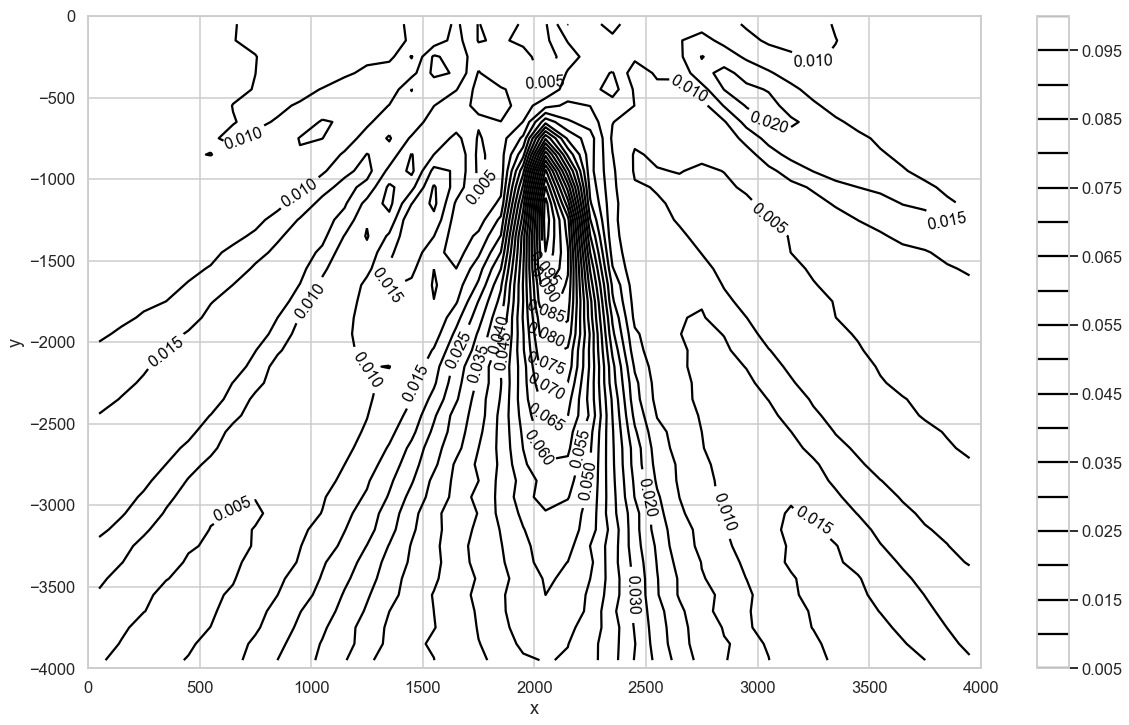

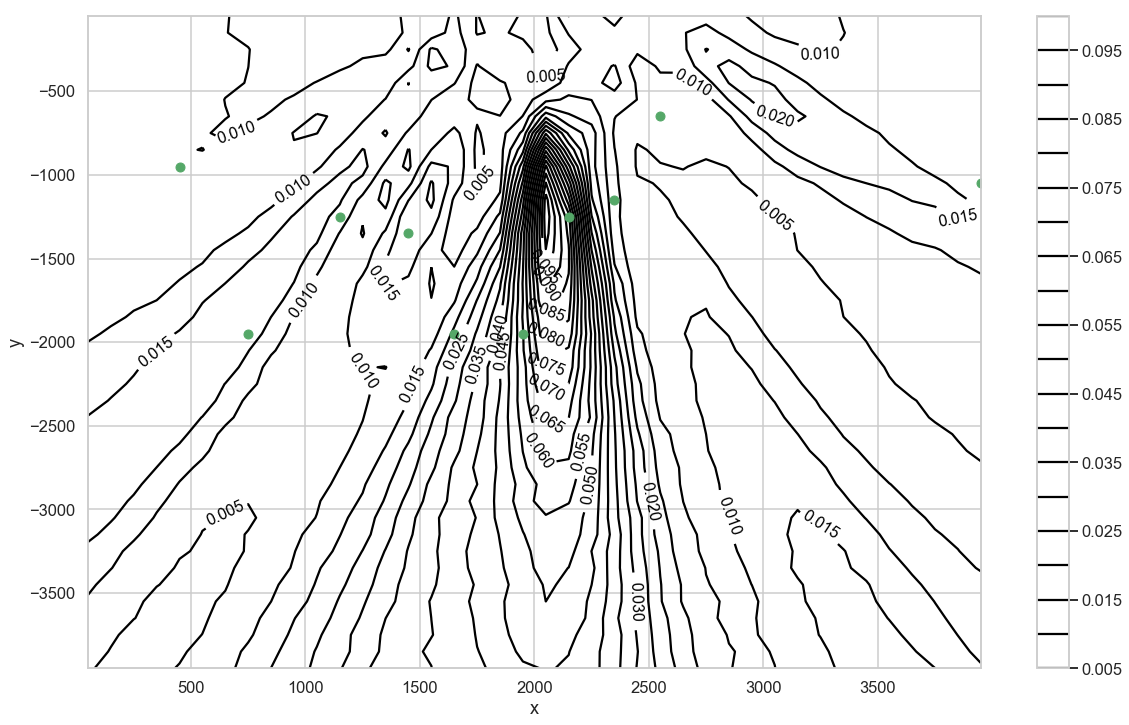

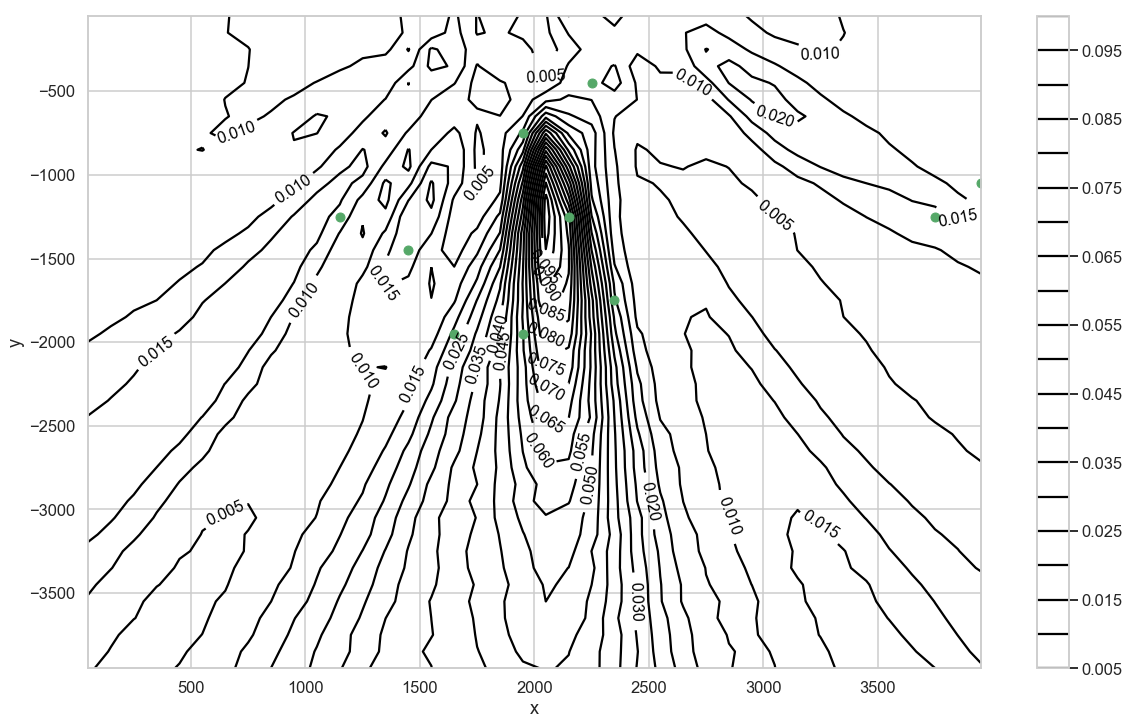

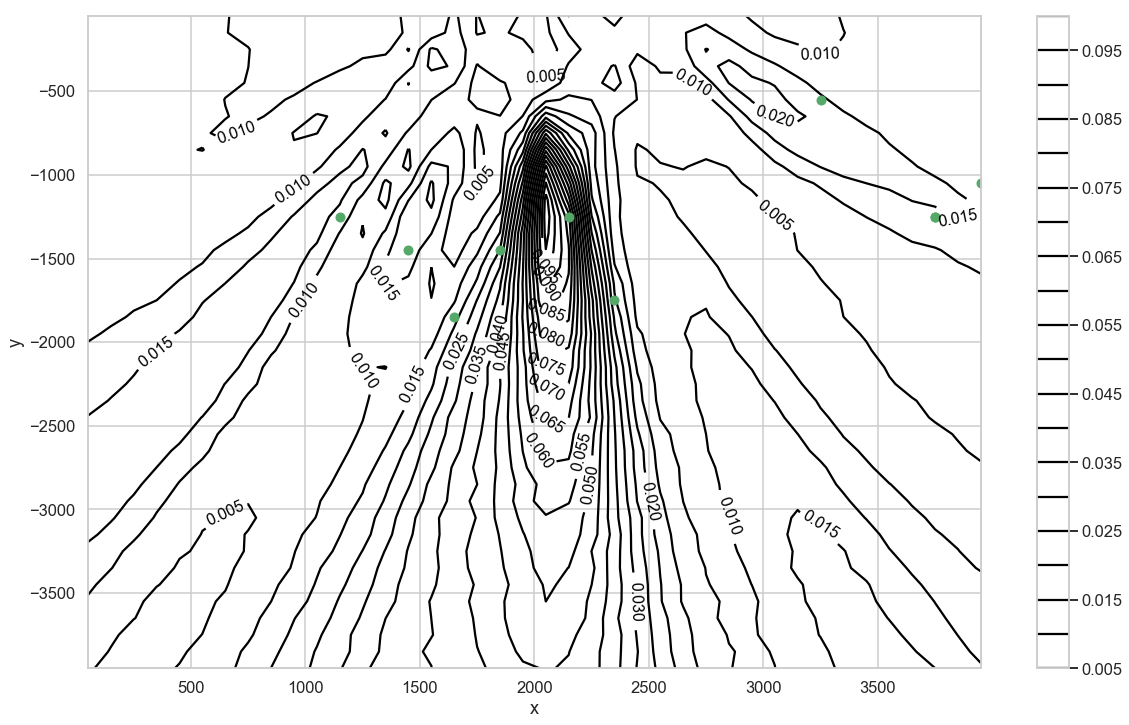

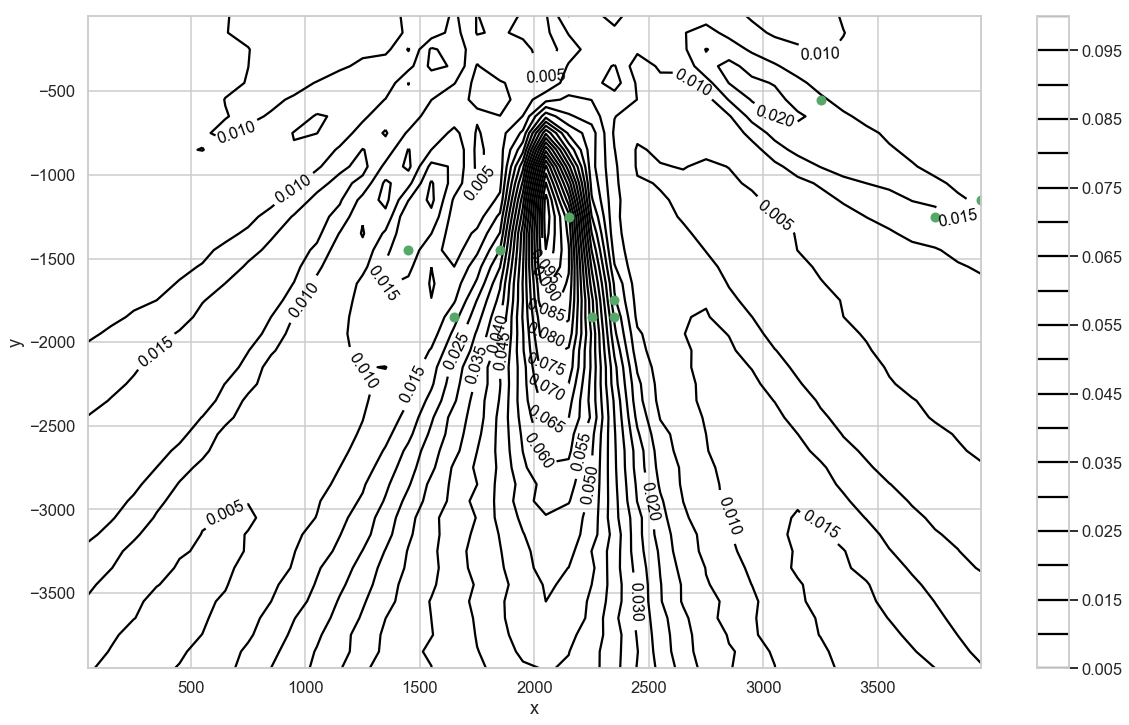

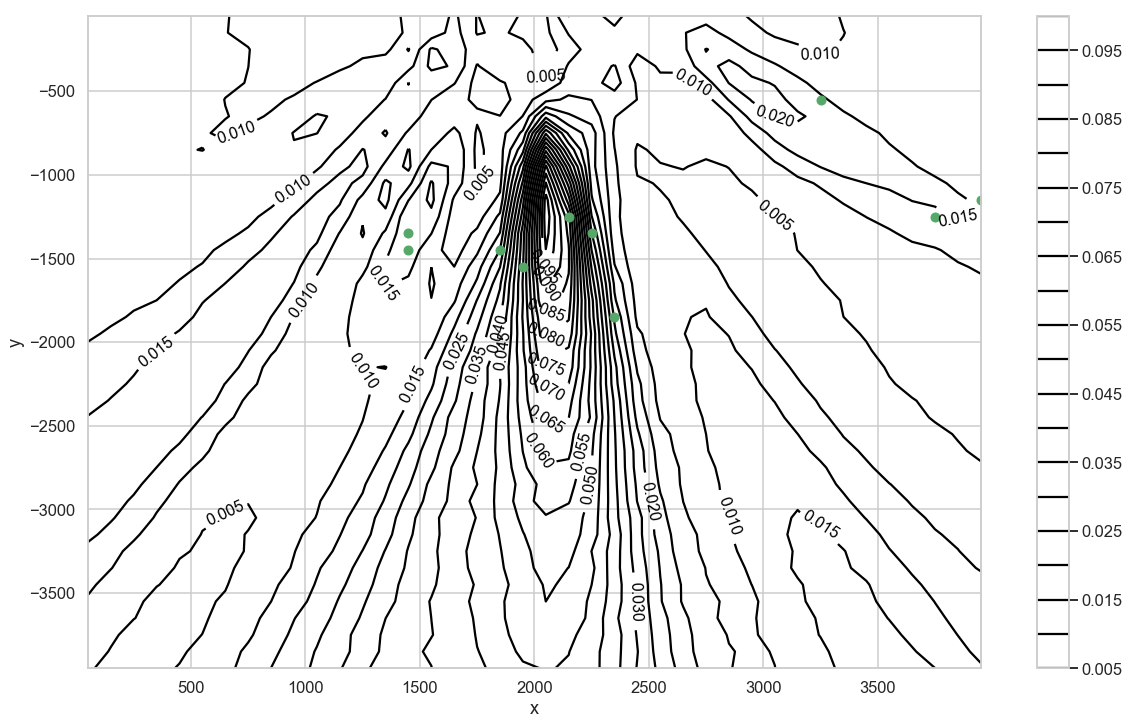

In [290]:
def genetic_p(f,a,P2,count_gen=5,h=10):
    #count_gen = int(a[0]*0.2)
    p1 = create_new_population(f,a,h=h)
    p0 = p1
    for i in range(count_gen):
        p1 = create_new_generation(f,p1,a,n_s=h)
        plt.figure()
        plot_countor(load_f("P2.txt"))
        for p in p1:
            plt.plot(P2[p[0]+p[1]][0],P2[p[0]+p[1]][1],'og')

        p0 = p1
   
    return f(*p1[0]),p1[0]


plot_countor(load_f("P2.txt"))
plt.xlim(0,4000)
plt.ylim(-4000,0)
P2=load_f("P2.txt")
f = lambda x,y: -P2[int(x)+int(y)][2]
genetic_p(f,[400,400],P2)

#### Подбор параметров

#### Генетический алгоритм

100
136
172
209
245
281
318
354
390
427
463
500
Wall time: 10min 22s


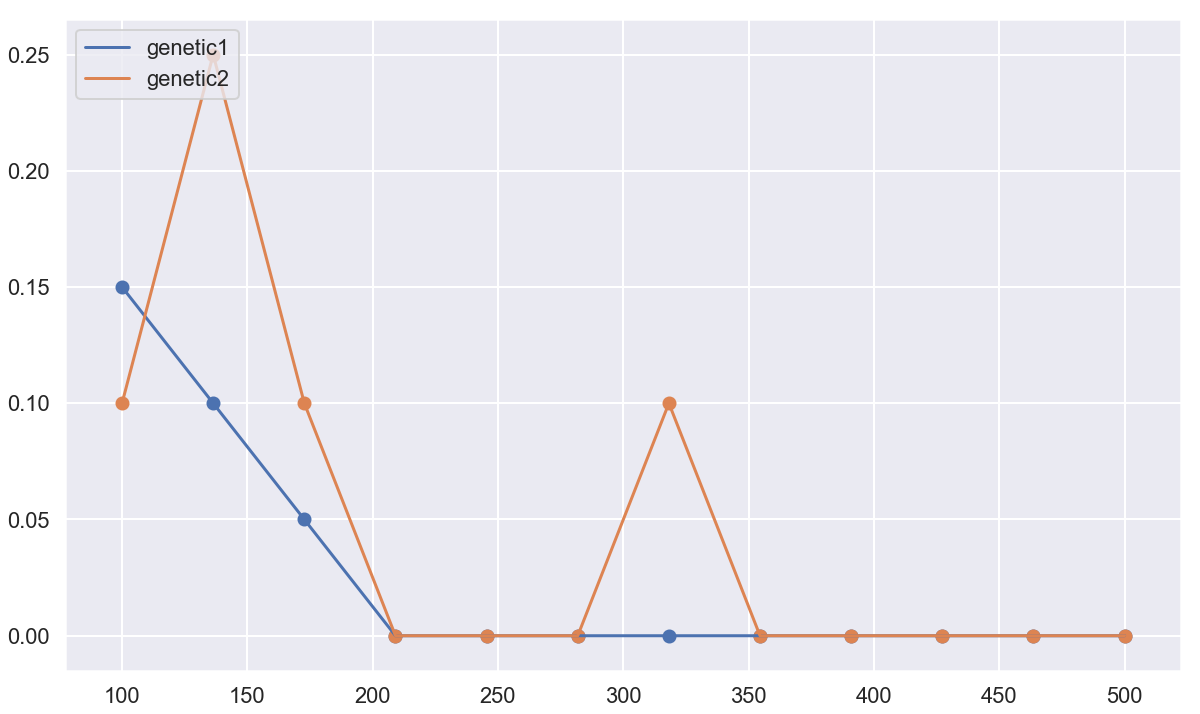

In [27]:
%%time
def test_genetic(f,a,hh,test_ans,max_test=20):
    sns.set_context("poster")
    errors=[[],[]]
    for h in hh:
        err1 = 0
        err2 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = genetic(f,a,h=int(h))-test_ans
            ans2 = genetic2(f,a,h=int(h))-test_ans
            if ans1 != 0:
                err1 +=1
            if ans2 != 0:
                err2 +=1
        errors[0].append(err1/max_test)
        errors[1].append(err2/max_test)
    plt.plot(hh,errors[0],label='genetic1')
    plt.scatter(hh,errors[0])
    plt.plot(hh,errors[1],label='genetic2')
    plt.scatter(hh,errors[1])
    plt.legend(loc='upper left')
    return errors

f = lambda x,y: P2[int(x)][int(y)]
a = [P2.shape[0],P2.shape[1]]
test_ans = np.min(P2)
hh = np.linspace(100,500,12)

test_genetic(f,a,hh,test_ans)

100
136
172
209
245
281
318
354
390
427
463
500
Wall time: 3min 50s


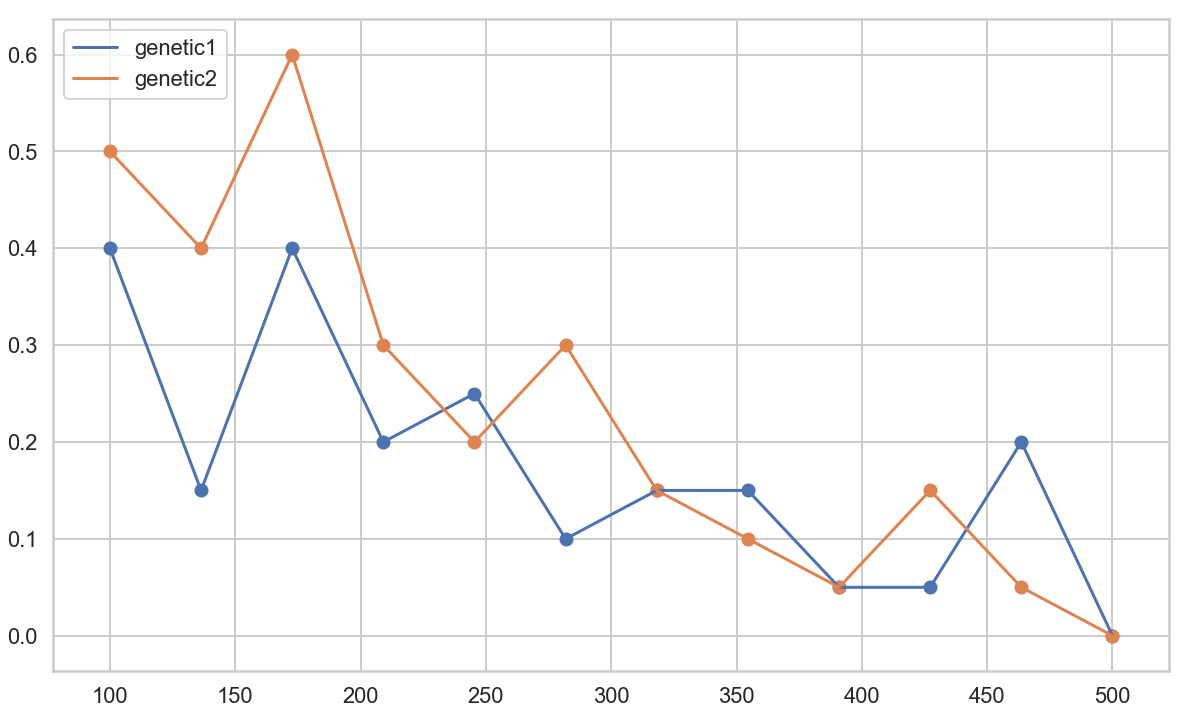

In [95]:
%%time
def test_genetic(f,a,hh,test_ans,max_test=20):
    sns.set_context("poster")
    errors=[[],[]]
    for h in hh:
        err1 = 0
        err2 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = genetic(f,a,h=int(h))-test_ans
            ans2 = genetic2(f,a,h=int(h))-test_ans
            if ans1 != 0:
                err1 +=1
            if ans2 != 0:
                err2 +=1
        errors[0].append(err1/max_test)
        errors[1].append(err2/max_test)
    plt.plot(hh,errors[0],label='genetic1')
    plt.scatter(hh,errors[0])
    plt.plot(hh,errors[1],label='genetic2')
    plt.scatter(hh,errors[1])
    plt.legend(loc='upper left')
    return errors

f = lambda x,y: P2[int(x)][int(y)]
a = [P2.shape[0],P2.shape[1]]
test_ans = np.min(P2)
hh = np.linspace(100,500,12)

test_genetic(f,a,hh,test_ans)

100
120
141
162
183
204
225
Wall time: 2min 49s


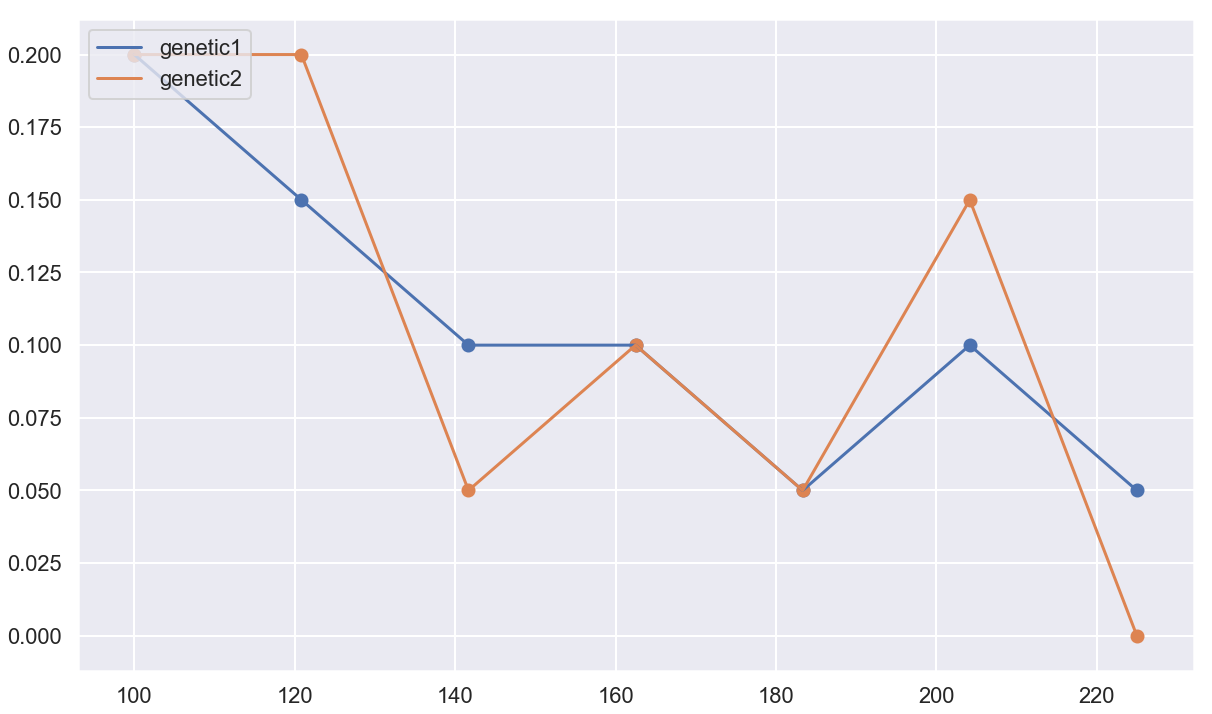

In [22]:
%%time
def test_genetic(f,a,hh,test_ans,max_test=20):
    sns.set_context("poster")
    errors=[[],[]]
    for h in hh:
        err1 = 0
        err2 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = genetic(f,a,h=int(h))-test_ans
            ans2 = genetic2(f,a,h=int(h))-test_ans
            if ans1 != 0:
                err1 +=1
            if ans2 != 0:
                err2 +=1
        errors[0].append(err1/max_test)
        errors[1].append(err2/max_test)
    plt.plot(hh,errors[0],label='genetic1')
    plt.scatter(hh,errors[0])
    plt.plot(hh,errors[1],label='genetic2')
    plt.scatter(hh,errors[1])
    plt.legend(loc='upper left')
    return errors

f = lambda x,y: P2[int(x)][int(y)]
a = [P2.shape[0],P2.shape[1]]
test_ans = np.min(P2)
hh = np.linspace(100,225,7)

test_genetic(f,a,hh,test_ans)

100
621
1142
1663
2184
2705
3226
3747
4268
4789
5310
5831
6352
6873
7394
7915
8436
8957
9478
10000
Wall time: 27.5 s


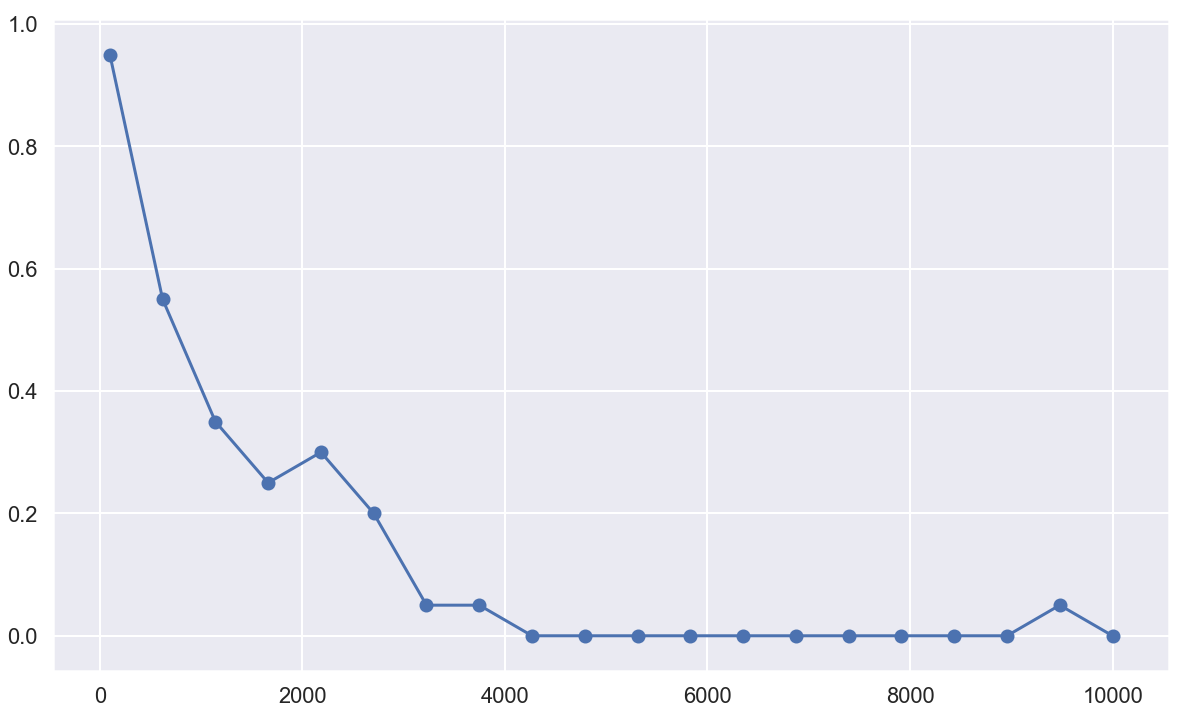

In [23]:
%%time
def test_fire(P2,hh,max_test=20):
    f = lambda x,y: P2[int(x)][int(y)]
    a = [P2.shape[0],P2.shape[1]]
    test_ans = np.min(P2)
    sns.set_context("poster")
    errors=[]
    for h in hh:
        err1 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = imitation_of_fire(f,a,max_iter=int(h))-test_ans
            if ans1 != 0:
                err1 +=1
        errors.append(err1/max_test)
    plt.plot(hh,errors)
    plt.scatter(hh,errors)
    return errors

hh = np.linspace(1e2,1e4,20)

test_fire(P2,hh)

In [ ]:
%%time
def test_random(P2,hh,max_test=20):
    test_ans = np.min(P2)
    sns.set_context("poster")
    errors=[]
    for h in hh:
        err1 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = random_search(P2,max_iter=int(h))-test_ans
            if ans1 != 0:
                err1 +=1
        errors.append(err1/max_test)
    plt.plot(hh,errors)
    plt.scatter(hh,errors)
    return errors

hh = np.linspace(0.05,0.8,20)

test_random(P2,hh)

#### Test all

In [52]:
def test(P):
    f = lambda x,y: P[int(x)][int(y)]
    a = [P.shape[0],P.shape[1]]
    return perebor(P),random_search(P),imitation_of_fire(f,a),genetic(f,a),genetic2(f,a)

In [67]:
test(P2),test(P4_V1),test(P4_V2),test(P4_V3),test(P4_V4)

((0.00225006, 0.00244664, 0.00225006, 0.00225006, 0.00245219),
 (0.00159419, 0.00177057, 0.00159419, 0.00202405, 0.00202405),
 (0.00140179, 0.00140179, 0.00149905, 0.00142012, 0.00140179),
 (0.000768731, 0.000768731, 0.000768731, 0.000768731, 0.000768731),
 (0.00130828, 0.00130828, 0.0016222, 0.00130828, 0.00198873))

In [26]:
np.min(P2),np.min(P4_V1),np.min(P4_V2),np.min(P4_V3),np.min(P4_V4)

(0.00225006, 0.00159419, 0.00140179, 0.000768731, 0.00130828)

In [70]:
def test_p(P,method):
    f = lambda x,y: P[int(x)][int(y)]
    a = [P.shape[0],P.shape[1]]
    
    max_test = 100
    test = perebor(P)
    err = 0
    for i in range(max_test):
        ans = method(f,a)-test
        if ans != 0:
            err += 1
            
    return 1-err/max_test

In [80]:
def test_r(P):
    
    max_test = 100
    test = perebor(P)
    err = 0
    for i in range(max_test):
        ans = random_search(P)-test
        if ans != 0:
            err += 1
            
    return err/max_test

In [81]:
print(test_r(P4_V1))
print(test_p(P4_V1,genetic2))
print(test_p(P4_V1,genetic))
print(test_p(P4_V1,imitation_of_fire))

0.54
0.25
0.25
0.0


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


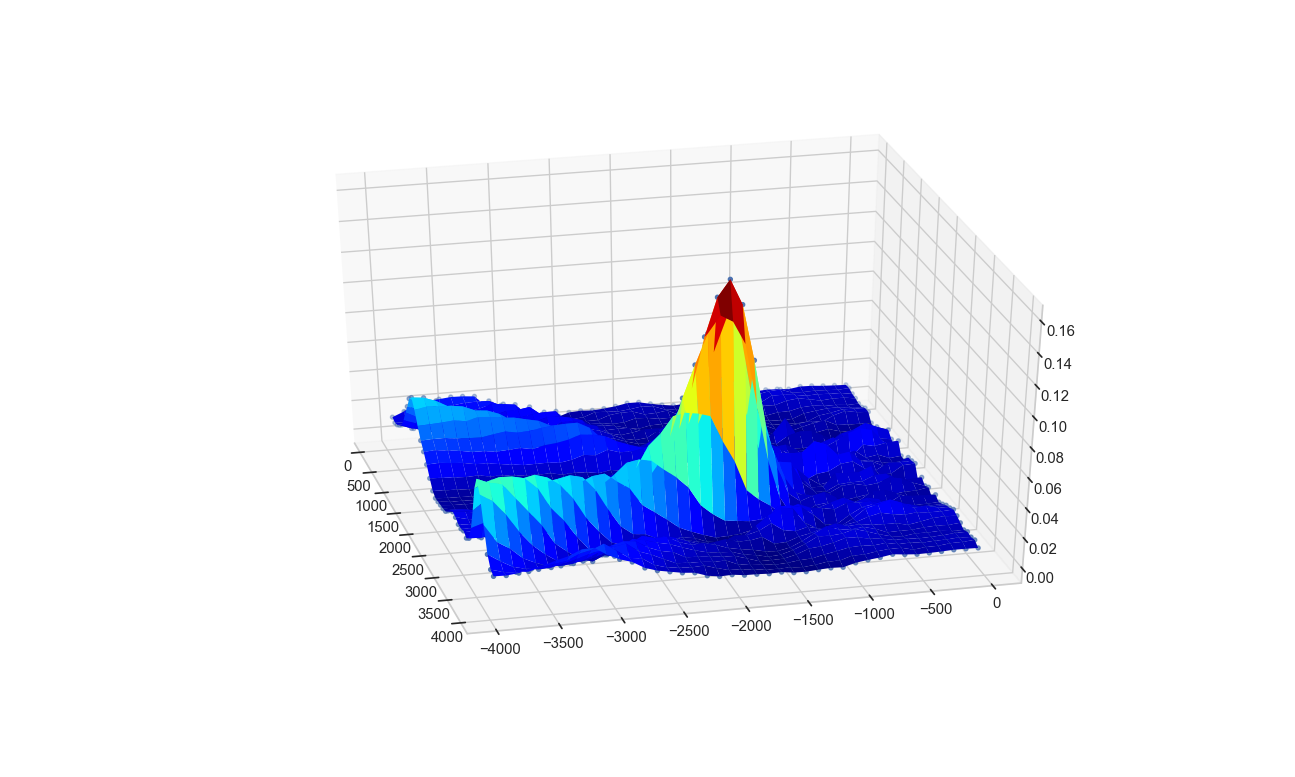

In [87]:
%pylab notebook
plot_3d(load_f("P4_V1.txt"))
pylab.rcParams['figure.figsize'] = (40, 12)

Populating the interactive namespace from numpy and matplotlib


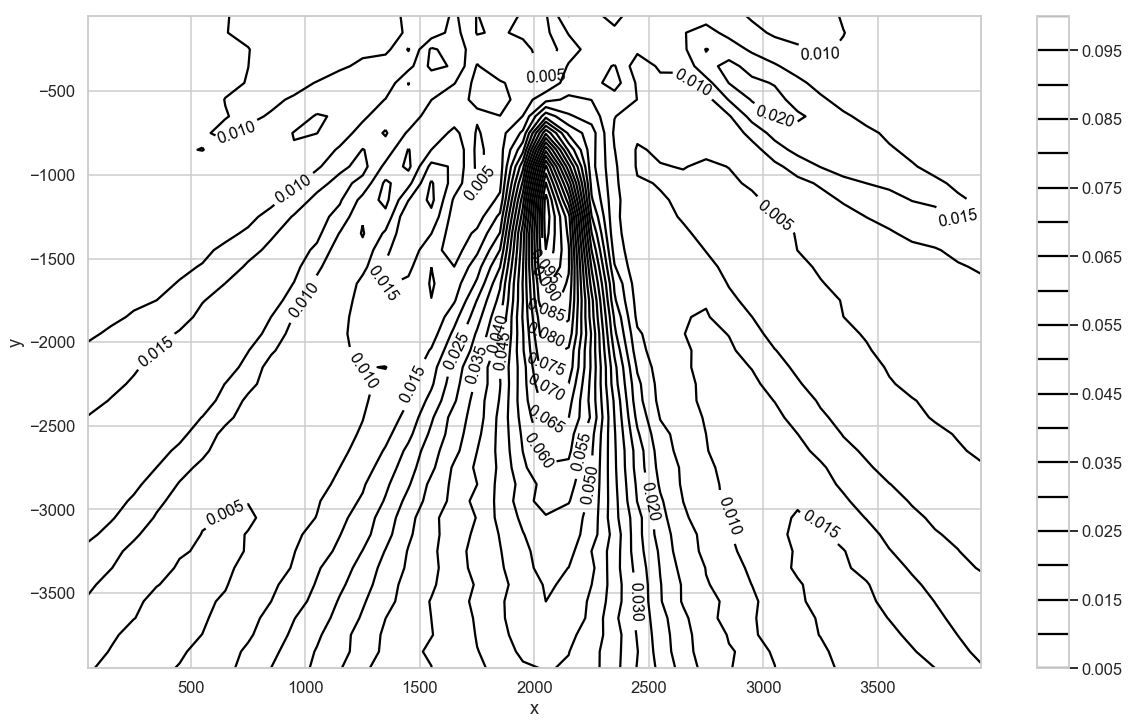

In [200]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
plot_countor(load_f("P2.txt"))

In [123]:
%%time
def test_im2(P2,hh,max_test=20):
    f = lambda x,y: P2[int(x)][int(y)]
    a = [P2.shape[0],P2.shape[1]]
    test_ans = np.min(P2)
    sns.set_context("poster")
    errors=[]
    for h in hh:
        err1 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = imitation_of_fire(f,a,max_iter=int(h))-test_ans
            if ans1 != 0:
                err1 +=1
        errors.append(1-err1/max_test)
    #plt.plot(hh,errors)
    #plt.scatter(hh,errors)
    return errors

hh = np.linspace(100,200,2)

err_fire = test_im2(P2,hh)

100
200
Wall time: 122 ms


In [191]:
%%time
def test_g2(P2,hh,max_test=20,method=genetic):
    f = lambda x,y: P2[int(x)][int(y)]
    a = [P2.shape[0],P2.shape[1]]
    test_ans = np.min(P2)
    sns.set_context("poster")
    errors=[]
    for h in hh:
        err1 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = method(f,a,count_gen=int(h))-test_ans
            if ans1 != 0:
                err1 +=1
        errors.append(1-err1/max_test)
    errors[0]=0
    return errors

hh = np.linspace(100,200,2)

err_gen1 = test_g2(P2,hh)
err_gen2 = test_g2(P2,hh,method=genetic2)

100
200
100
200
Wall time: 2.72 s


In [145]:
%%time
def test_r2(P2,hh,max_test=20,method=genetic):
    test_ans = np.min(P2)
    sns.set_context("poster")
    errors=[]
    for h in hh:
        err1 = 0
        print(int(h))
        for i in range(max_test):
            ans1 = random_search(P2,p=h/P2.shape[0])-test_ans
            if ans1 != 0:
                err1 +=1
        errors.append(1-err1/max_test)
    return errors

hh = np.linspace(100,200,2)

err_rand = test_r2(P2,hh)

100
200
Wall time: 62.8 ms


1
67
134
200
267
333
400
466
533
600
0
6
13
20
26
33
40
46
53
60
0
6
13
20
26
33
40
46
53
60
1
67
134
200
267
333
400
466
533
600
Wall time: 15.5 s


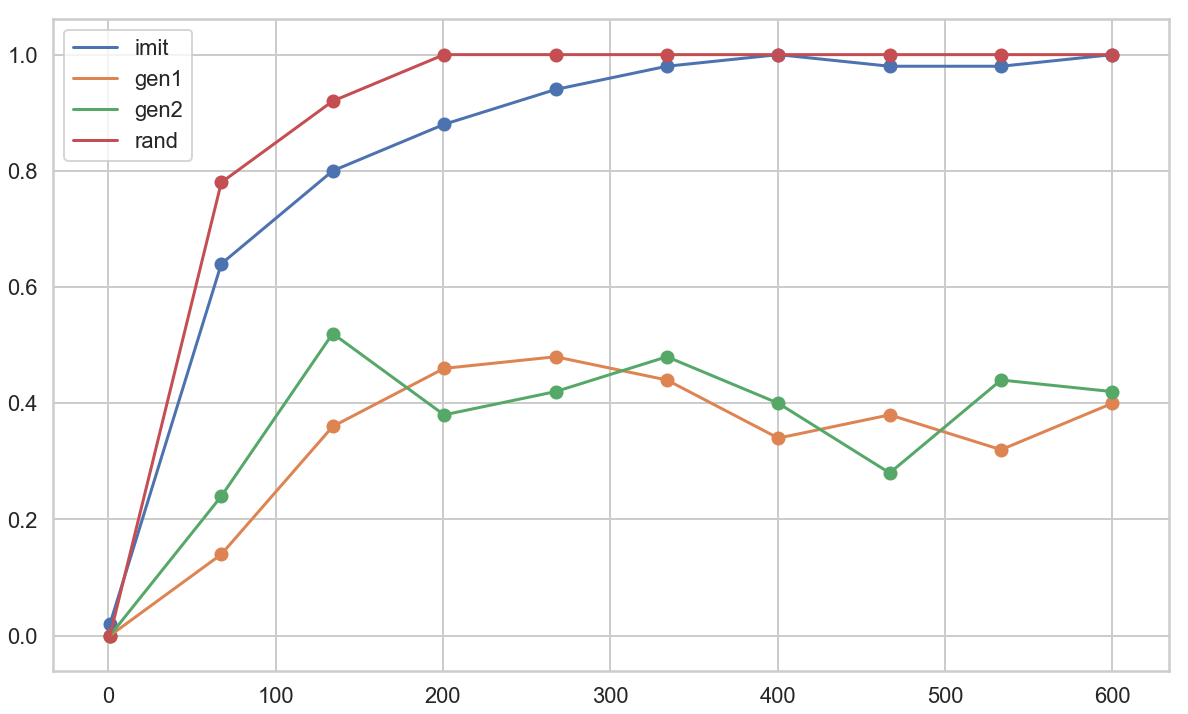

In [291]:
%%time
hh = np.linspace(1,600,10)

max_test=50
err_fire = test_im2(-P2,hh,max_test=max_test)
err_gen1 = test_g2(-P2,hh/10,method=genetic,max_test=max_test)
err_gen2 = test_g2(-P2,hh/10,method=genetic,max_test=max_test)
err_rand = test_r2(-P2,hh,max_test=max_test)

errors_method = {'imit':(err_fire,hh),'gen1':(err_gen1,np.array(hh)),'gen2':(err_gen2,np.array(hh)),'rand':(err_rand,hh)}

for (key,value) in errors_method.items():
    plt.plot(value[1],value[0],label=key)
    plt.scatter(value[1],value[0])
plt.legend(loc='upper left')

In [189]:
%%time
def test_g3(P2,hh,max_test=20,method=genetic):
    P = load_f("P2.txt")
    #P2 = P.T[2].reshape(1600,1)
    f = lambda x,y: P2[int(x)][int(y)]
    a = [P2.shape[0],P2.shape[1]]
    test_ans = np.min(P2)
    x_min = np.argmin(P2)
    dx = np.abs(P[0][0]-P[1][0])
    dy = np.abs(P[0][1]-P[1][1])
    sns.set_context("poster")
    errors=[]
    for h in hh:
        err1 = 0
        print(int(h))
        for i in range(max_test):
            ans1,x = method(f,a,count_gen=int(h))
            x=x[0]
            if ans1-test_ans != 0:
                if not((P[x][0]-P[x_min][0])/dx <= 1 and (P[x][1]-P[x_min][1])/dy <= 1):
                    err1 +=1
        errors.append(1-err1/max_test)
    errors[0]=0
    return errors

hh = np.linspace(100,200,2)

err_gen1 = test_g3(P2,hh,method=genetic_r)
err_gen2 = test_g3(P2,hh,method=genetic2_r)

100
200
100
200
Wall time: 2.83 s


1
67
134
200
267
333
400
466
533
600
0
6
13
20
26
33
40
46
53
60
0
6
13
20
26
33
40
46
53
60
1
67
134
200
267
333
400
466
533
600
Wall time: 15.7 s


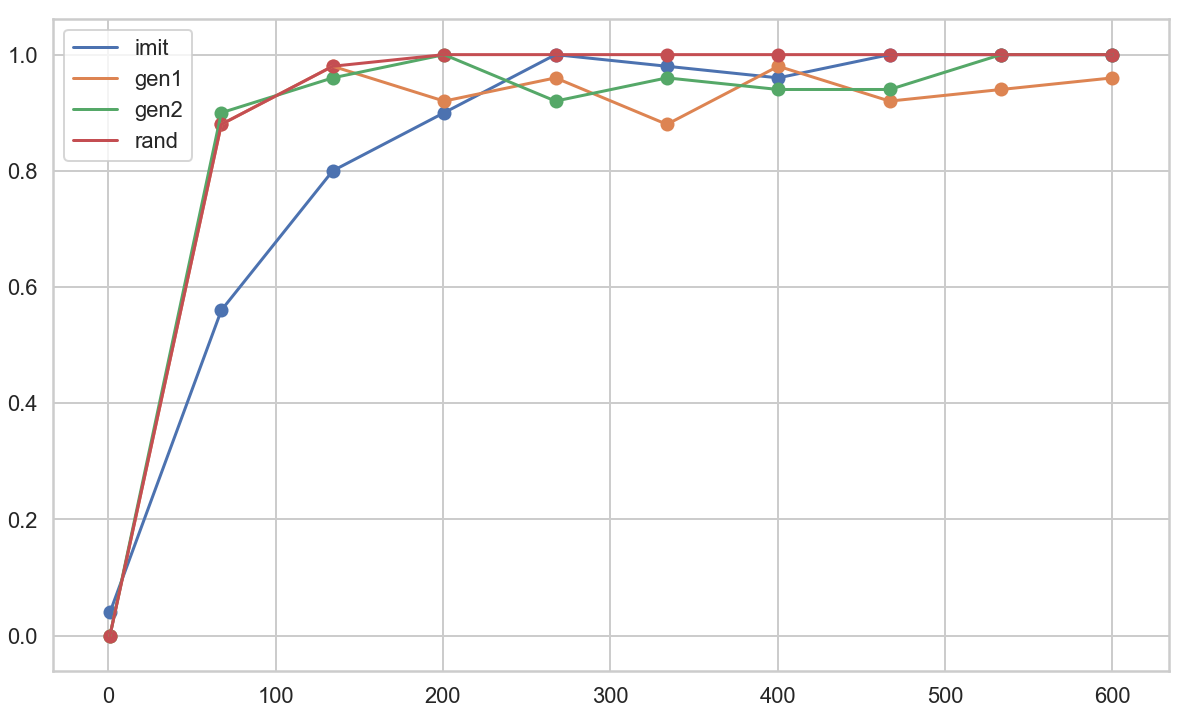

In [292]:
%%time
hh = np.linspace(1,600,10)

max_test=50
err_fire = test_im2(-P2,hh,max_test=max_test)
err_gen1 = test_g3(-P2,hh/10,method=genetic_r,max_test=max_test)
err_gen2 = test_g3(-P2,hh/10,method=genetic2_r,max_test=max_test)
err_rand = test_r2(-P2,hh,max_test=max_test)

errors_method = {'imit':(err_fire,hh),'gen1':(err_gen1,np.array(hh)),'gen2':(err_gen2,np.array(hh)),'rand':(err_rand,hh)}

for (key,value) in errors_method.items():
    plt.plot(hh,value[0],label=key)
    plt.scatter(hh,value[0])
plt.legend(loc='upper left')